In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.gridspec as gridspec
import datetime
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
Housing_data = pd.read_csv('cleaned_1.csv')
Housing_data = Housing_data.set_index(['parcelid','Unnamed: 0'])
#print(Housing_data.info())
Housing_data.head()

,,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,fireplacecnt,garagecarcnt,garagetotalsqft,hashottuborspa,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,PropUseType,tax_deviation
parcelid,Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
17073783,0,1.0,2.5,3.0,9.0,1264.0,6111.0,0.0,2.0,0.0,0.0,...,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,2016-01-27,3.0,0.272081
17088994,1,1.0,1.0,2.0,9.0,777.0,6111.0,0.0,1.0,0.0,0.0,...,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,2016-03-30,3.0,0.090416
17100444,2,1.0,2.0,3.0,9.0,1101.0,6111.0,0.0,2.0,441.0,0.0,...,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,2016-05-27,3.0,0.736777
17102429,3,1.0,1.5,2.0,9.0,1554.0,6111.0,1.0,2.0,460.0,0.0,...,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,2016-06-07,3.0,0.642900
17109604,4,1.0,2.5,4.0,9.0,2415.0,6111.0,1.0,2.0,665.0,0.0,...,277000.0,554000.0,2015.0,277000.0,5886.92,6.111002e+13,0.0573,2016-08-08,3.0,0.752010


In [3]:
#del Housing_data['garagetotalsqft'] # this has a very large amount of missing data, so will be excluded for now
Housing_data['transactiondate'] = pd.to_datetime(Housing_data['transactiondate'], 
                                                 format = '%Y-%m-%d', errors = 'coerce')
#Housing_data['yearbuilt'] = pd.to_datetime(Housing_data['yearbuilt'], format='%Y.0', errors='coerce').dt.year
#Housing_data['assessmentyear'] = pd.to_datetime(Housing_data['assessmentyear'], 
                                                #format='%Y-%m-%d', errors='coerce').dt.year
#Housing_data['taxdelinquencyyear'] = pd.to_datetime(Housing_data['taxdelinquencyyear'], 
                                                    #format='%Y-%m-%d', errors='coerce').dt.year

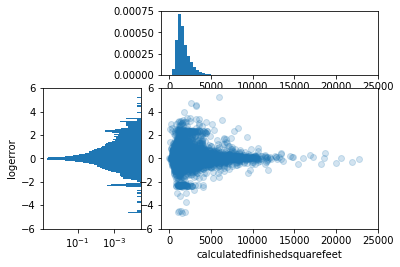

In [3]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['calculatedfinishedsquarefeet','logerror']].dropna()

lower_right.scatter(space_df['calculatedfinishedsquarefeet'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['calculatedfinishedsquarefeet'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(-1000, 25000)
    ax.set_xlabel('calculatedfinishedsquarefeet')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6,6)

side_histogram.set_ylabel('logerror')
side_histogram.set_xscale('log')
#plt.title('calculatedfinishedsquarefeet')

Text(0,0.5,'logerror')

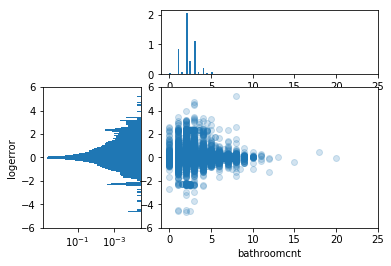

In [4]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['bathroomcnt','logerror']].dropna()

lower_right.scatter(space_df['bathroomcnt'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['bathroomcnt'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(-1, 25)
    ax.set_xlabel('bathroomcnt')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
side_histogram.set_xscale('log')   
side_histogram.set_ylabel('logerror')

Text(0,0.5,'logerror')

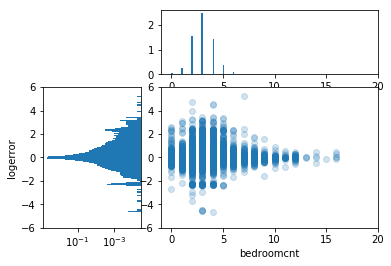

In [6]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['bedroomcnt','logerror']].dropna()

lower_right.scatter(space_df['bedroomcnt'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['bedroomcnt'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(-1, 20)
    ax.set_xlabel('bedroomcnt')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
side_histogram.set_xscale('log')
side_histogram.set_ylabel('logerror')

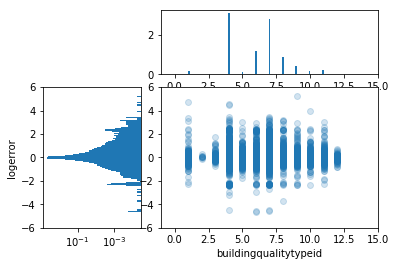

In [7]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['buildingqualitytypeid','logerror']].dropna()

lower_right.scatter(space_df['buildingqualitytypeid'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['buildingqualitytypeid'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(-1, 15)
    ax.set_xlabel('buildingqualitytypeid')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6,6)

side_histogram.set_ylabel('logerror')
side_histogram.set_xscale('log')

Text(0,0.5,'fireplacecnt')

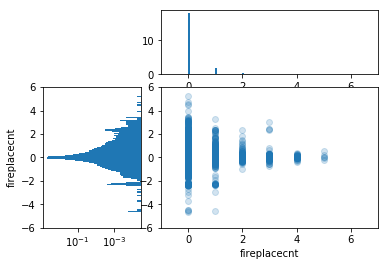

In [8]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['fireplacecnt','logerror']].dropna()

lower_right.scatter(space_df['fireplacecnt'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['fireplacecnt'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(-1, 7)
    ax.set_xlabel('fireplacecnt')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
side_histogram.set_xscale('log')   
side_histogram.set_ylabel('fireplacecnt')

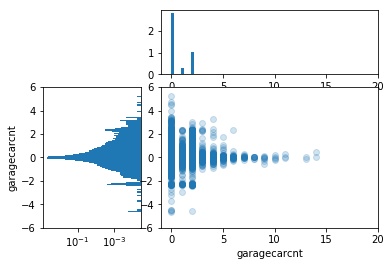

In [9]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['garagecarcnt','logerror']].dropna()

lower_right.scatter(space_df['garagecarcnt'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['garagecarcnt'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(-1, 20)
    ax.set_xlabel('garagecarcnt')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('garagecarcnt')
side_histogram.set_xscale('log')

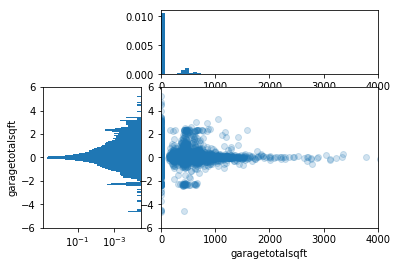

In [10]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['garagetotalsqft','logerror']].dropna()

lower_right.scatter(space_df['garagetotalsqft'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['garagetotalsqft'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(-1, 4000)
    ax.set_xlabel('garagetotalsqft')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('garagetotalsqft')
side_histogram.set_xscale('log')

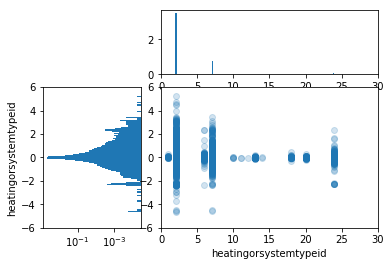

In [11]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['heatingorsystemtypeid','logerror']].dropna()

lower_right.scatter(space_df['heatingorsystemtypeid'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['heatingorsystemtypeid'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 30)
    ax.set_xlabel('heatingorsystemtypeid')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('heatingorsystemtypeid')
side_histogram.set_xscale('log')

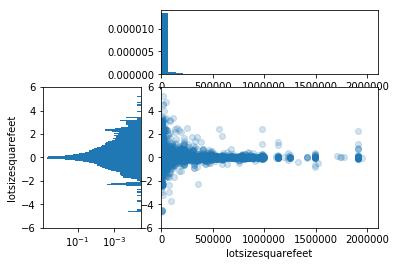

In [12]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['lotsizesquarefeet','logerror']].dropna()

lower_right.scatter(space_df['lotsizesquarefeet'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['lotsizesquarefeet'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(-100, 2100000)
    ax.set_xlabel('lotsizesquarefeet')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('lotsizesquarefeet')
side_histogram.set_xscale('log')

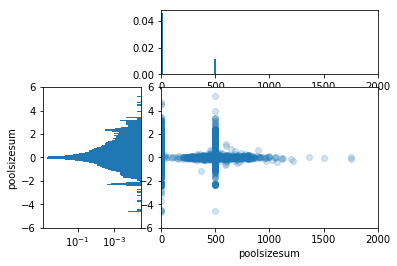

In [13]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['poolsizesum','logerror']].dropna()

lower_right.scatter(space_df['poolsizesum'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['poolsizesum'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 2000)
    ax.set_xlabel('poolsizesum')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('poolsizesum')
side_histogram.set_xscale('log')

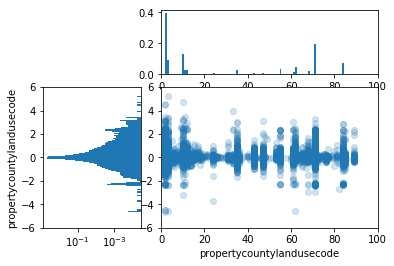

In [14]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['propertycountylandusecode','logerror']].dropna()

lower_right.scatter(space_df['propertycountylandusecode'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['propertycountylandusecode'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 100)
    ax.set_xlabel('propertycountylandusecode')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('propertycountylandusecode')
side_histogram.set_xscale('log')

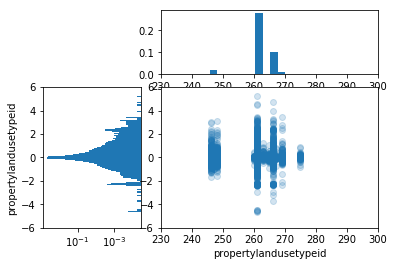

In [15]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['propertylandusetypeid','logerror']].dropna()

lower_right.scatter(space_df['propertylandusetypeid'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['propertylandusetypeid'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(230, 300)
    ax.set_xlabel('propertylandusetypeid')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('propertylandusetypeid')
side_histogram.set_xscale('log')

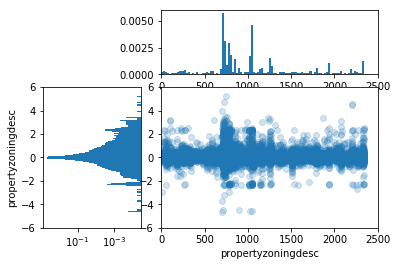

In [16]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['propertyzoningdesc','logerror']].dropna()

lower_right.scatter(space_df['propertyzoningdesc'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['propertyzoningdesc'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(-1, 2500)
    ax.set_xlabel('propertyzoningdesc')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('propertyzoningdesc')
side_histogram.set_xscale('log')

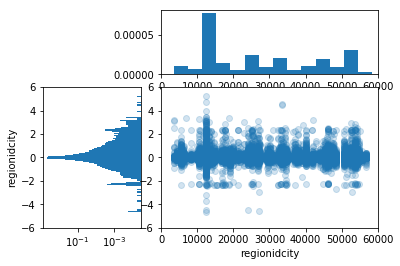

In [17]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['regionidcity','logerror']].dropna()

lower_right.scatter(space_df['regionidcity'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['regionidcity'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 60000)
    ax.set_xlabel('regionidcity')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('regionidcity')
side_histogram.set_xscale('log')

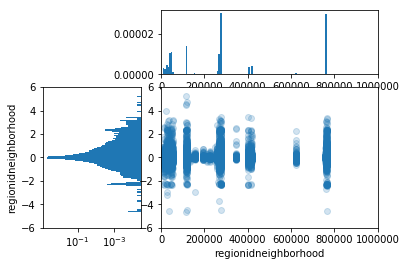

In [18]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['regionidneighborhood','logerror']].dropna()

lower_right.scatter(space_df['regionidneighborhood'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['regionidneighborhood'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1000000)
    ax.set_xlabel('regionidneighborhood')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('regionidneighborhood')
side_histogram.set_xscale('log')

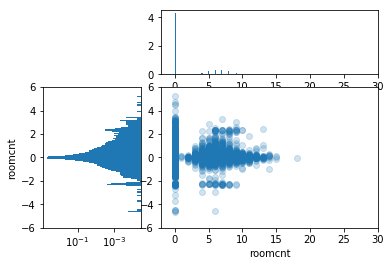

In [19]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['roomcnt','logerror']].dropna()

lower_right.scatter(space_df['roomcnt'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['roomcnt'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(-2, 30)
    ax.set_xlabel('roomcnt')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('roomcnt')
side_histogram.set_xscale('log')

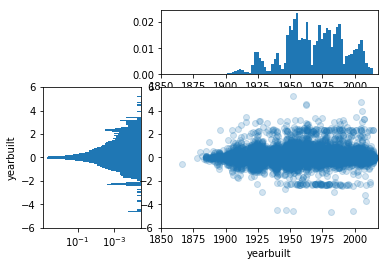

In [20]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['yearbuilt','logerror']].dropna()

lower_right.scatter(space_df['yearbuilt'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['yearbuilt'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(1850, 2018)
    ax.set_xlabel('yearbuilt')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('yearbuilt')
side_histogram.set_xscale('log')

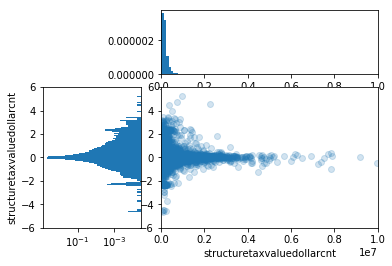

In [21]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['structuretaxvaluedollarcnt','logerror']].dropna()

lower_right.scatter(space_df['structuretaxvaluedollarcnt'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['structuretaxvaluedollarcnt'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 10000000)
    ax.set_xlabel('structuretaxvaluedollarcnt')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('structuretaxvaluedollarcnt')
side_histogram.set_xscale('log')

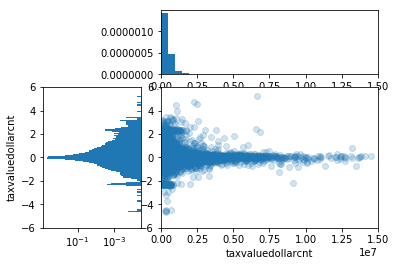

In [22]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['taxvaluedollarcnt','logerror']].dropna()

lower_right.scatter(space_df['taxvaluedollarcnt'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['taxvaluedollarcnt'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 15000000)
    ax.set_xlabel('taxvaluedollarcnt')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('taxvaluedollarcnt')
side_histogram.set_xscale('log')

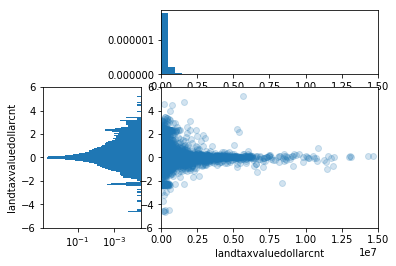

In [23]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['landtaxvaluedollarcnt','logerror']].dropna()

lower_right.scatter(space_df['landtaxvaluedollarcnt'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['landtaxvaluedollarcnt'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 15000000)
    ax.set_xlabel('landtaxvaluedollarcnt')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('landtaxvaluedollarcnt')
side_histogram.set_xscale('log')

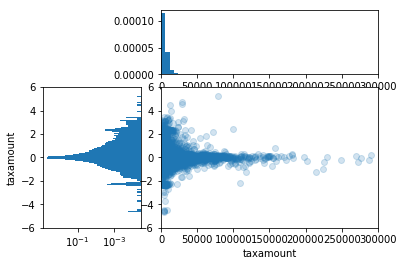

In [24]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['taxamount','logerror']].dropna()

lower_right.scatter(space_df['taxamount'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['taxamount'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 300000)
    ax.set_xlabel('taxamount')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('taxamount')
side_histogram.set_xscale('log')

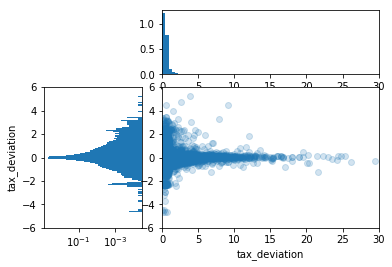

In [34]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['tax_deviation','logerror']].dropna()

lower_right.scatter(space_df['tax_deviation'],space_df['logerror'], alpha = 0.2)
top_histogram.clear()
top_histogram.hist(space_df['tax_deviation'], bins=100, density = 'normal')
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', density = 'normal')
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 30)
    ax.set_xlabel('tax_deviation')
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-6, 6)
    
side_histogram.set_ylabel('tax_deviation')
side_histogram.set_xscale('log')

In [4]:
cols_for_reg = ['calculatedfinishedsquarefeet','bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
               'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'lotsizesquarefeet',
               'poolsizesum', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc',
               'regionidcity', 'regionidneighborhood', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
               'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount','tax_deviation', 'latitude', 'longitude',
               'transactiondate', 'logerror']
Housing_data[cols_for_reg].to_csv('for_reg.csv')